In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


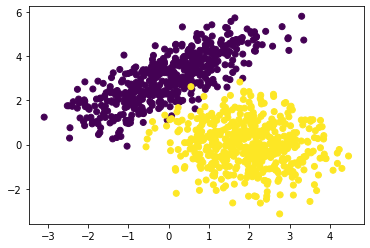

In [4]:
clSize = 500
class1 = np.random.multivariate_normal(size= clSize, mean=[0, 3],cov = [[1,1.3],[1.3,1]])
class2 = np.random.multivariate_normal(size= clSize, mean=[2, 0],cov = [[1,-0.1],[-0.1,1]])
#kowariancja macierz odchylen standardowych

inputs = np.vstack((class1, class2)).astype(np.float32)

#inputs[:,:3]

labels = np.vstack((np.zeros((clSize,1),dtype = "float32"), np.ones((clSize,1), dtype="float32")))


plt.scatter(inputs[:,0], inputs[:,1],c= labels[:,0])

In [19]:
inputs[:,:3]

array([[ 9.2606902e-01,  4.1873908e+00],
       [-1.4395248e+00,  2.3416054e+00],
       [ 4.1967660e-01,  2.9292436e+00],
       ...,
       [ 2.1316495e+00,  3.6879980e-03],
       [ 7.4036187e-01, -1.0719872e-01],
       [ 2.9485104e+00,  3.2443082e-01]], dtype=float32)

In [5]:
inputDim = 2 
outputDim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (inputDim, outputDim)))
b = tf.Variable(initial_value = tf.random.uniform(shape = (outputDim,)))
W, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.7068565 ],
        [0.15404463]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.4493214], dtype=float32)>)

In [6]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [7]:
def squareLoss(desired, actual):
  return tf.reduce_mean(tf.square(desired - actual))

In [24]:
learningRate = 0.1

def trainStep(inputs, labels):
  with tf.GradientTape() as tape:
    predicted = model(inputs)
    loss = squareLoss(labels, predicted)
  gr_loss_W, gr_loss_b = tape.gradient(loss, [W, b])
  W.assign_sub(learningRate * gr_loss_W)
  b.assign_sub(learningRate * gr_loss_b)
  return loss

  

In [23]:
steps = 30
for i in range(steps):
  loss = trainStep(inputs, labels)
  print(f"iter: {i}, loss: {loss}")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
 [-1.65908933e-02]
 [ 7.47200251e-02]
 [ 1.28348678e-01]
 [ 2.37922341e-01]
 [ 1.23556018e-01]
 [-1.25573575e-01]
 [ 9.46841240e-02]
 [ 1.49148285e-01]
 [ 3.54552865e-02]
 [ 3.71198058e-02]
 [ 1.82940394e-01]
 [ 7.03049898e-02]
 [-3.09082866e-02]
 [ 6.71173334e-02]
 [ 1.50514692e-01]
 [-1.06072247e-01]
 [ 1.49134755e-01]
 [ 2.63024807e-01]
 [-6.04646802e-02]
 [ 1.12415522e-01]
 [ 7.00376034e-02]
 [ 8.87755156e-02]
 [ 2.99921393e-01]
 [ 1.02891624e-01]
 [ 3.13583374e-01]
 [ 2.63254642e-02]
 [ 1.28976017e-01]
 [ 1.88587904e-01]
 [-2.20019221e-02]
 [ 3.31668258e-02]
 [ 4.56251502e-02]
 [ 8.08167458e-02]
 [ 1.69795126e-01]
 [ 2.80240238e-01]
 [ 2.47859031e-01]
 [ 3.59959602e-02]
 [ 1.05197310e-01]
 [ 1.53300911e-01]
 [ 1.51647031e-01]
 [ 1.46047771e-01]
 [ 2.19369888e-01]
 [-1.66696489e-01]
 [ 1.37214065e-01]
 [-1.68058574e-01]
 [-5.78200221e-02]
 [ 3.40396166e-02]
 [-6.99131489e-02]
 [ 1.16824269e-01]
 [ 1.19764745e-01]
 [ 9

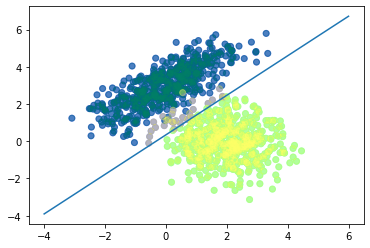

In [14]:
actual = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c = actual[:,0]> 0.5, alpha = 0.5, cmap = 'winter')
plt.scatter(inputs[:,0], inputs[:,1], c = labels[:,0]> 0.5, alpha = 0.4, cmap = 'summer')
x = np.linspace(-4, 6, 50)
y = - W[0]/W[1] * x + (0.5 - b )/W[1]
plt.plot(x,y) 

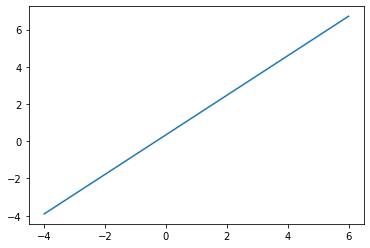

In [13]:
x = np.linspace(-4, 6, 50)
y = - W[0]/W[1] * x + (0.5 - b )/W[1]
plt.plot(x,y) 

In [ ]:
#dodanie funkcji sigmoidalenj aktywacji

In [16]:
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-3.9040098e+00, -3.6872778e+00, -3.4705455e+00, -3.2538137e+00,
       -3.0370815e+00, -2.8203495e+00, -2.6036174e+00, -2.3868852e+00,
       -2.1701534e+00, -1.9534210e+00, -1.7366890e+00, -1.5199568e+00,
       -1.3032248e+00, -1.0864927e+00, -8.6976075e-01, -6.5302861e-01,
       -4.3629655e-01, -2.1956447e-01, -2.8323829e-03,  2.1389967e-01,
        4.3063176e-01,  6.4736384e-01,  8.6409593e-01,  1.0808280e+00,
        1.2975600e+00,  1.5142921e+00,  1.7310241e+00,  1.9477563e+00,
        2.1644883e+00,  2.3812203e+00,  2.5979524e+00,  2.8146846e+00,
        3.0314164e+00,  3.2481484e+00,  3.4648807e+00,  3.6816127e+00,
        3.8983450e+00,  4.1150770e+00,  4.3318090e+00,  4.5485411e+00,
        4.7652731e+00,  4.9820051e+00,  5.1987376e+00,  5.4154696e+00,
        5.6322017e+00,  5.8489332e+00,  6.0656652e+00,  6.2823977e+00,
        6.4991298e+00,  6.7158618e+00], dtype=float32)>